# Prediction of Demand for Shared Bikes
## Problem Statement:
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-Sharing provider BoomBikes has recently suffered revenue dips due to pandemic situation. The Company is finding very difficult in to sustain in the current market scenaro.
Thay have planned to prepare themselves to cater to the people's needs once the situation gets better..So they want to understand the factors affecting the demand for these shared bikes in the American market.

The company wants to know

- Which variables are significant in predicting the demand for shared bikes.- 
How well those variables describe the bike demand

# Goal:
- Create a linear model that quantitatively relates to bike demand with variables such as season, holiday, working day, temperature and etc.,
- Accuracy of the model, i.e how well these variables can predict bike demands..
s

# Step 1: Reading and Understanding the Data
Import Numpy and Pandas, matplotlib and seaborn then read the data set to understand various columns..

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [2]:
bike_sharing = pd.read_csv(r'C:\Settu\aiml\Linear_Regression\MLR\Assignment\day.csv')

In [3]:
#lets check is there any headers or footers in the data set
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike_sharing.shape

(730, 16)

In [5]:
bike_sharing.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [6]:
# There are no headers and footer in the data set.
# Now lets check the missing values and null values in the data set.
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Data cleaning

In [7]:
#Here the column instant - Record Idex is having unique Id form 1 to 730 which may not add any value in the analysis. Hence drop the column
# cnt is including the count of casual and registered users. We dont need the model to predict separately for casual and Registered users. All we need is total demand.
# Hence we can delete the column casual and Registered.
# as per the data dictionary column dteday represents the data, we dont need a each day data analysis. it would be sufficient to have month or yearwise prediction.
# yr 0- representing 2018, 1 representing 2019.
#mnth - representing month from 1 to 12. Hence yteday would not be useful much. Hence let's delete this variable as well.
bike_sharing = bike_sharing.drop(['instant','casual','registered','dteday'], axis=1)

In [8]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


# Standardization of Data for better interpretation

In [9]:
bike_sharing_vis = bike_sharing

In [10]:
bike_sharing_vis.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [11]:
# Mapping numerical values to categorical value for better interpretation in plots.
season_map = { 1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
year_map = {0:2018, 1:2019}
weather_map ={ 1: "Clear", 2: "Cloudy", 3: "Light-Rain", 4: "Heavy-Rain" }
#datetime module weekday 0 represents Monday
weekday_map = { 0: "Monday",1: "Tuesday",2: "Wednesday",3: "Thursday",4: "Friday",5: "Saterday",6: "Sunday" }

bike_sharing_vis['season'] = bike_sharing_vis['season'].replace(season_map)
bike_sharing_vis['yr'] = bike_sharing_vis['yr'].replace(year_map)
bike_sharing_vis['weathersit'] = bike_sharing_vis['weathersit'].replace(weather_map)
bike_sharing_vis['weekday'] = bike_sharing_vis['weekday'].replace(weekday_map)

In [12]:
bike_sharing_vis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 68.6+ KB


# Visualizing the Data
This will help in interpreting the data well and identifying the variables that can turn out be useful in building the model

First now see, whether the Bike Demand is having a linear relationship with other variable
i if not, it makes no sense to go for linear regression model. Now lets see the scatter plot and other dist plot to see the relationship between target and independent variables

## Univariate Analysis

In [13]:
#Visualizing numerical and categorical variables
#lets do a univariate analysis on each numerical variables using hist plot

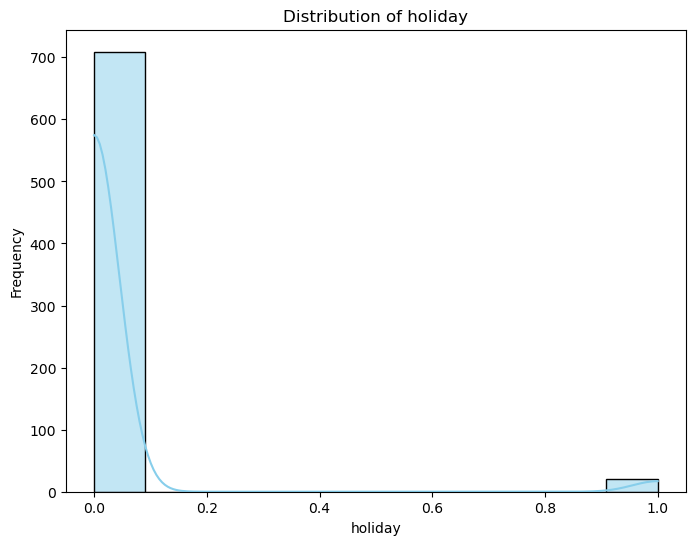

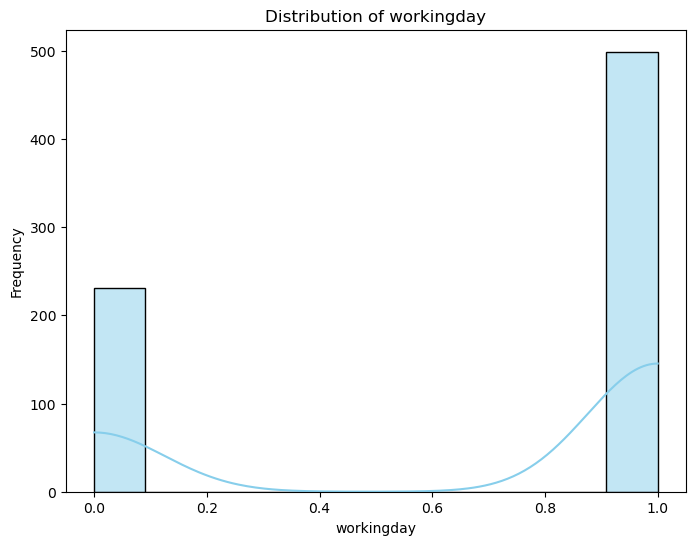

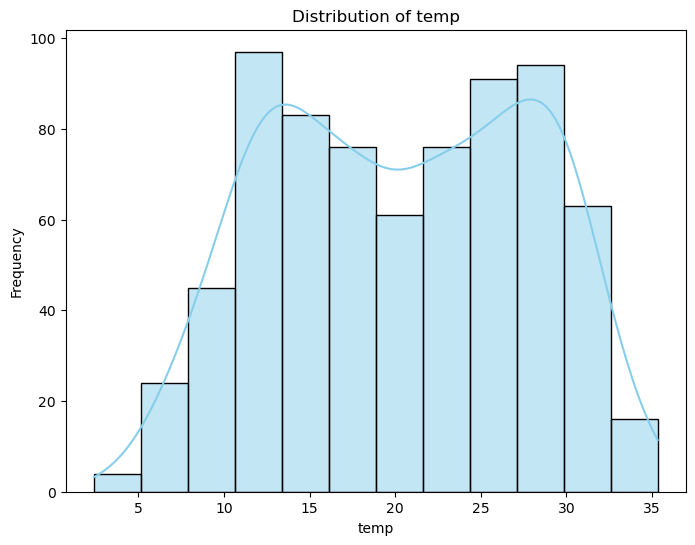

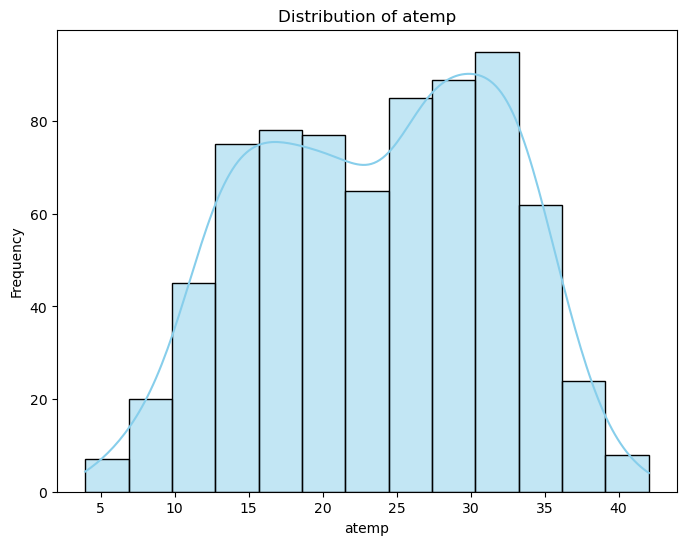

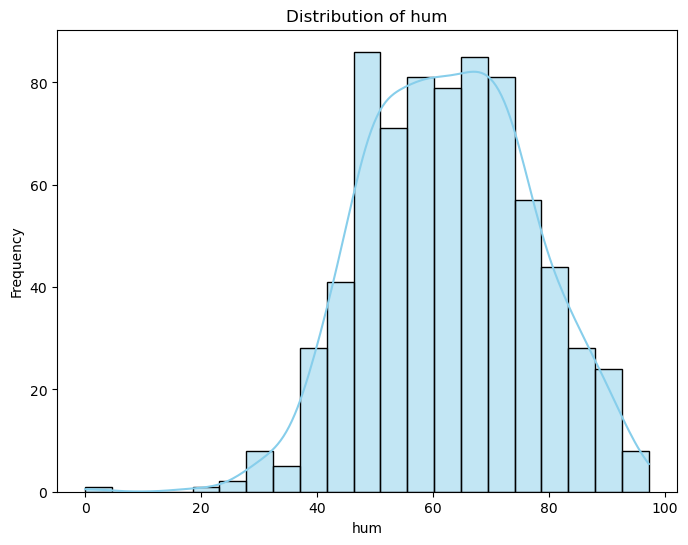

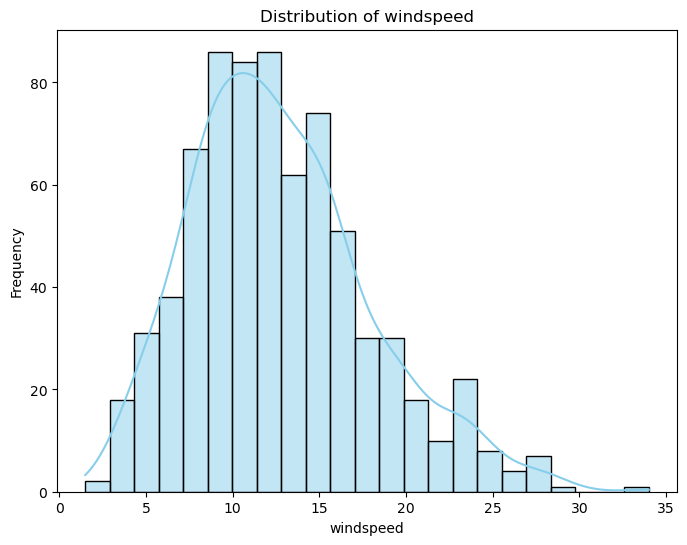

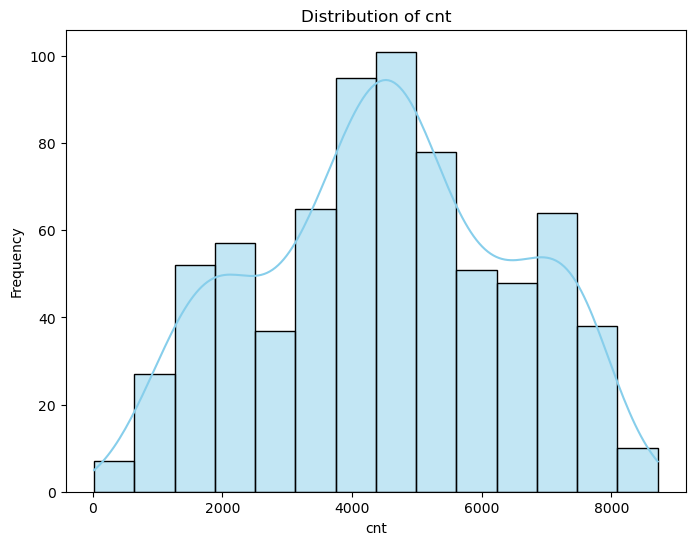

In [14]:
#Categorization of variable
Num_Columns = ['holiday','workingday','temp','atemp','hum','windspeed','cnt']
Cat_columns = ['season','weathersit','weekday']
for i in Num_Columns:
    plt.figure(figsize=(8,6))
    sns.histplot(bike_sharing_vis, x=i ,kde=True, color="skyblue", edgecolor="black")
    plt.title (f"Distribution of {i}" )
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.show()

#hist plot of columns 'yr' and 'mnth' not giving any interpretation.. hence removed from univariate analysis

# Observations from Univariate analysis
1. We have more working days than Holidays
2. Frequency of Temperature between 10 to 32.5 Degree Celsius, Almost Feel like temperature is also same as actual temperature.
3. Humidity varies from 40 to 90.
4. Windspeed frequency is varies from 5 to 20.
5. Frequency of Bike sharing varies from 2000 to 7500

## BiVariate Analysis

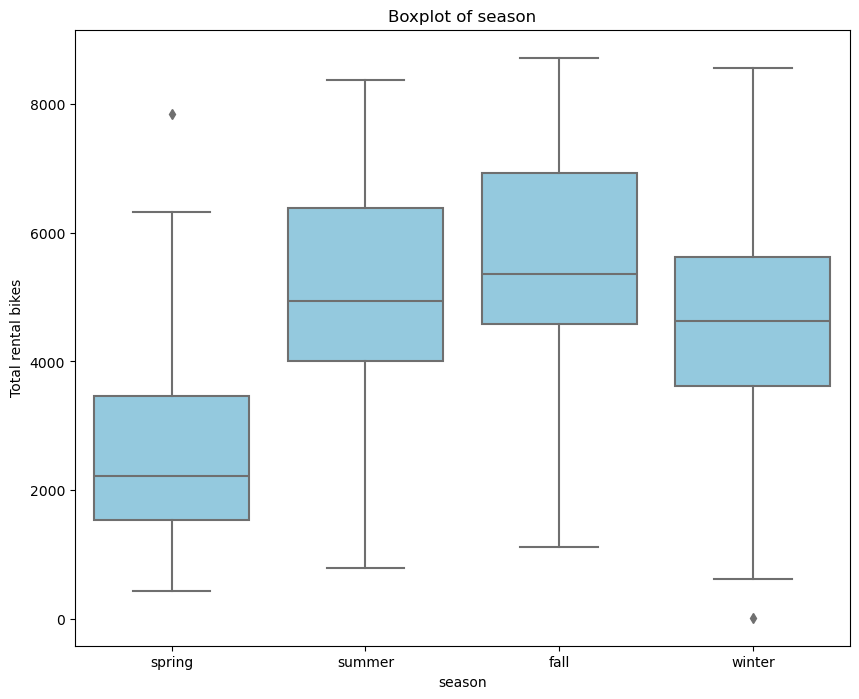

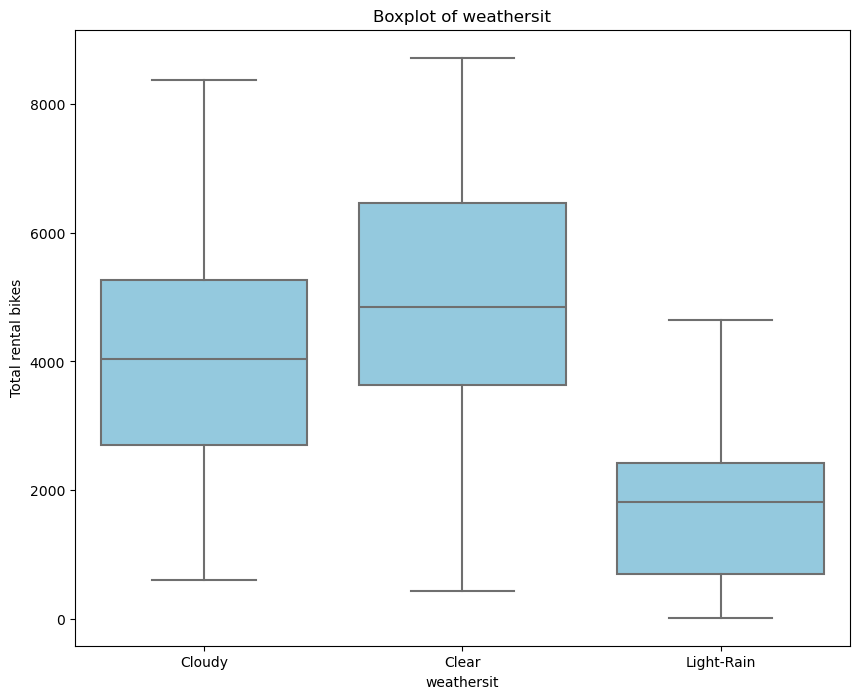

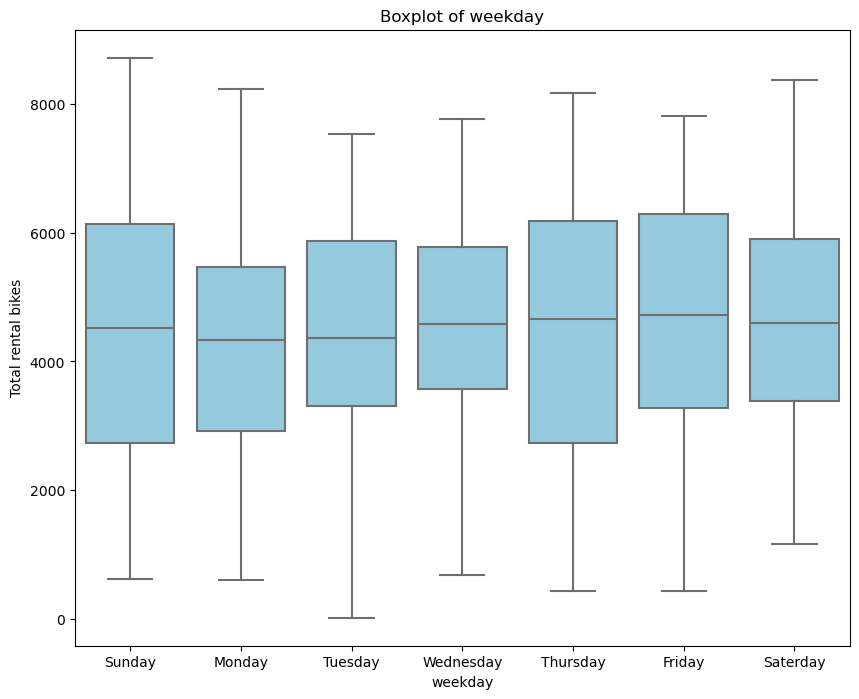

In [15]:
#Categorical value Bivariate analysis
for i in Cat_columns:
    plt.figure(figsize=(10,8))
    sns.boxplot(x=bike_sharing_vis[i],y=bike_sharing_vis['cnt'], color="skyblue")
    plt.title(f"Boxplot of {i}" )
    plt.ylabel('Total rental bikes')
    plt.show()

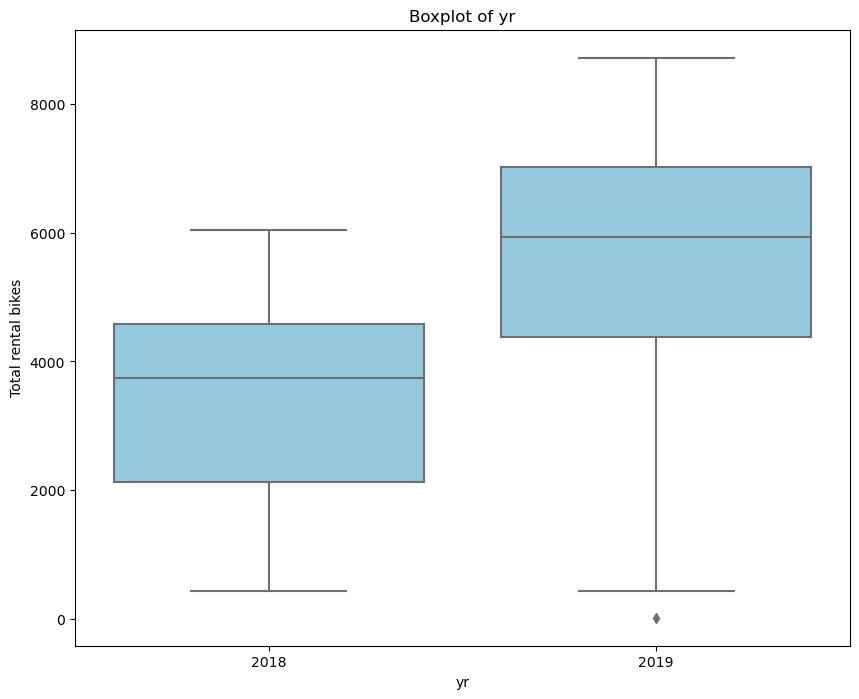

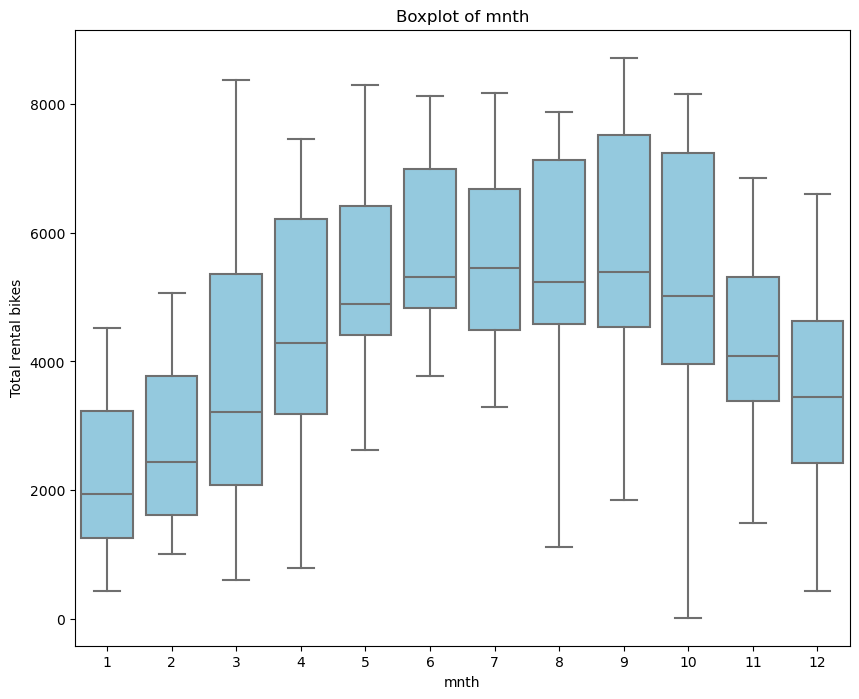

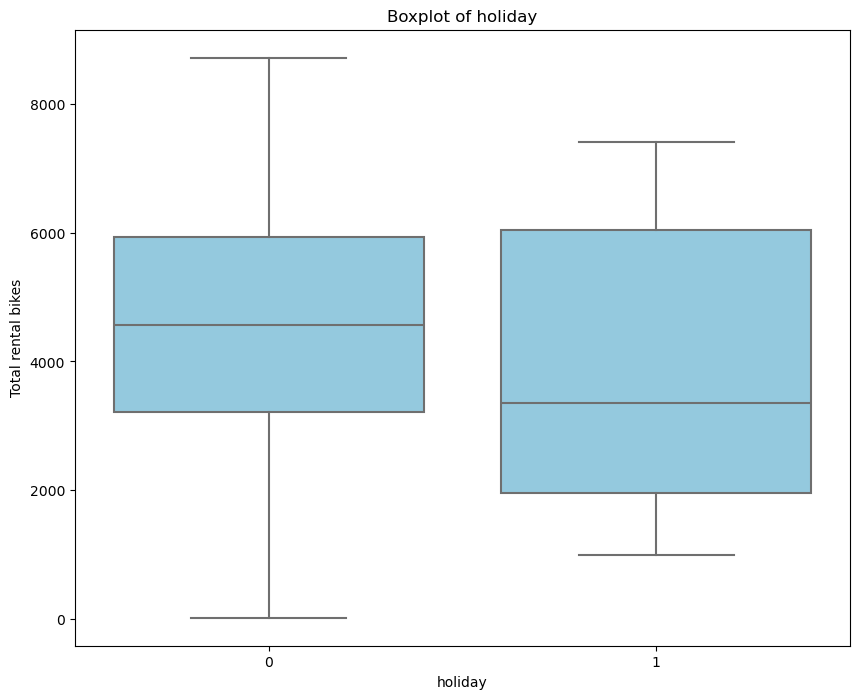

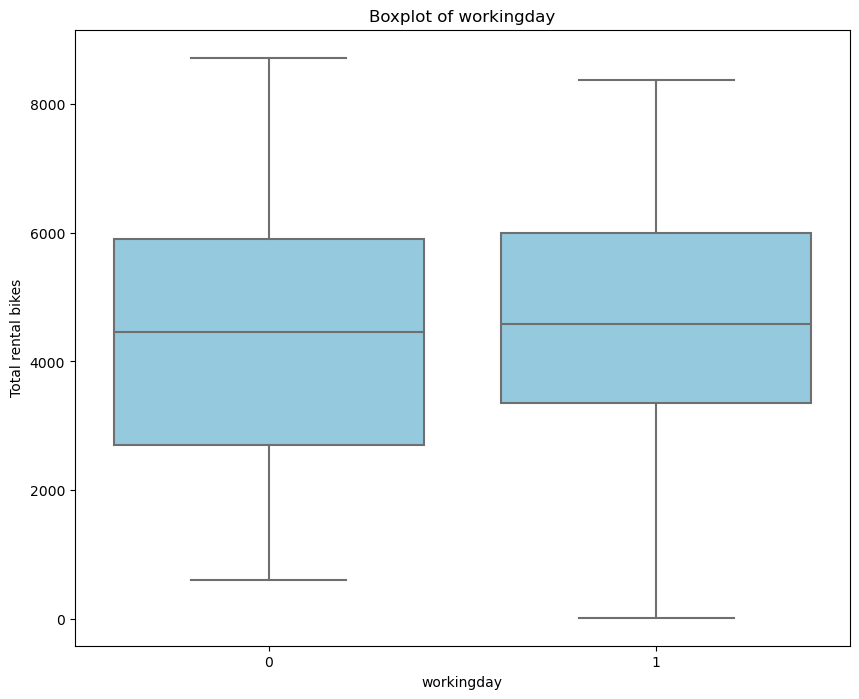

In [16]:
#Numerical value Bivariate Analysis
Num_Columns_Bi = ['yr','mnth','holiday','workingday']
for i in Num_Columns_Bi:
    plt.figure(figsize=(10,8))
    sns.boxplot(x=bike_sharing_vis[i],y=bike_sharing_vis['cnt'], color="skyblue")
    plt.title(f"Boxplot of {i}" )
    plt.ylabel('Total rental bikes')
    plt.show()

In [17]:
# temp, atemp,hum(humidity) and windspeed are continuous variables so for better analysis lets bucketize these values.
def bucketize_temperature(value):
    if (value <= 10):
        return '0-10 C'
    elif ( value > 10) and ( value <=20 ):
        return '10-20 C'
    elif (value >20 ) and ( value <= 30 ):
        return '20 - 30 C'
    elif (value > 30):
        return 'Above 30 C'

bike_sharing_vis['temp_b'] = bike_sharing_vis['temp'].apply(bucketize_temperature)
bike_sharing_vis['atemp_b'] = bike_sharing_vis['atemp'].apply(bucketize_temperature)

In [18]:
def bucketize_humidity(value):
    if (value <= 40):
        return '0-40'
    elif ( value > 40) and ( value <=60 ):
        return '40-60'
    elif (value >60 ) and ( value <= 80 ):
        return '60 - 80'
    elif (value > 80):
        return 'Above 80'

def bucketize_WindSpeed(value):
    if (value <= 5):
        return '0-5'
    elif ( value > 5) and ( value <=10 ):
        return '5-10'
    elif (value > 10 ) and ( value <= 15 ):
        return '10-15'
    elif (value > 15) and (value <=20):
        return '15-20'
    elif (value > 20 ) and (value <=25 ):
        return '20-25'
    elif (value > 25) and (value <=30):
        return '25-30'
    elif (value > 30 ):
        return 'Above 30'

bike_sharing_vis['hum_b'] = bike_sharing_vis['hum'].apply(bucketize_humidity)
bike_sharing_vis['windspeed_b'] = bike_sharing_vis['windspeed'].apply(bucketize_WindSpeed)
    

In [19]:
bike_sharing_vis.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,temp_b,atemp_b,hum_b,windspeed_b
0,spring,2018,1,0,Sunday,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985,10-20 C,10-20 C,Above 80,10-15
1,spring,2018,1,0,Monday,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801,10-20 C,10-20 C,60 - 80,15-20
2,spring,2018,1,0,Tuesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,0-10 C,0-10 C,40-60,15-20
3,spring,2018,1,0,Wednesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,0-10 C,10-20 C,40-60,10-15
4,spring,2018,1,0,Thursday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,0-10 C,10-20 C,40-60,10-15


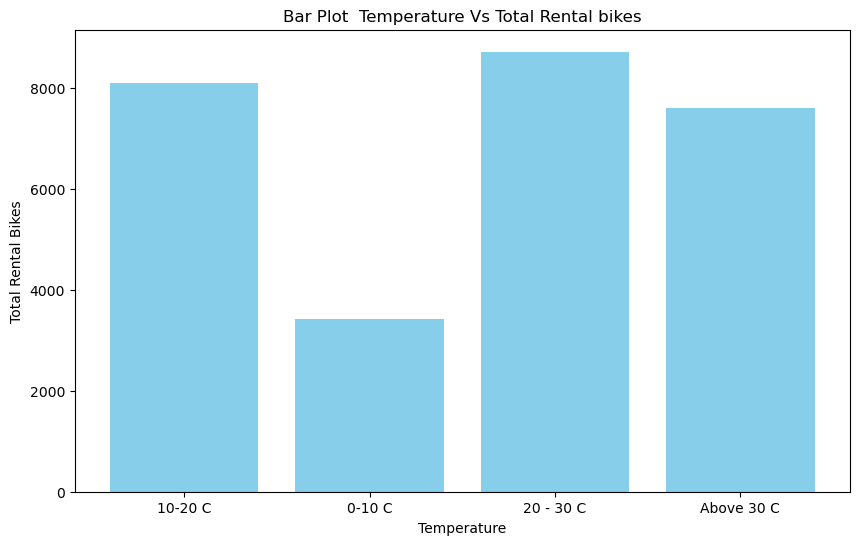

In [20]:
#Bar plot Bivariate analysis between Total Rented bikes vs temperature
plt.figure(figsize=(10,6))
plt.bar(bike_sharing_vis['temp_b'],bike_sharing_vis['cnt'], color = 'skyblue' )
plt.title('Bar Plot  Temperature Vs Total Rental bikes')
plt.xlabel('Temperature')
plt.ylabel('Total Rental Bikes')
plt.show()

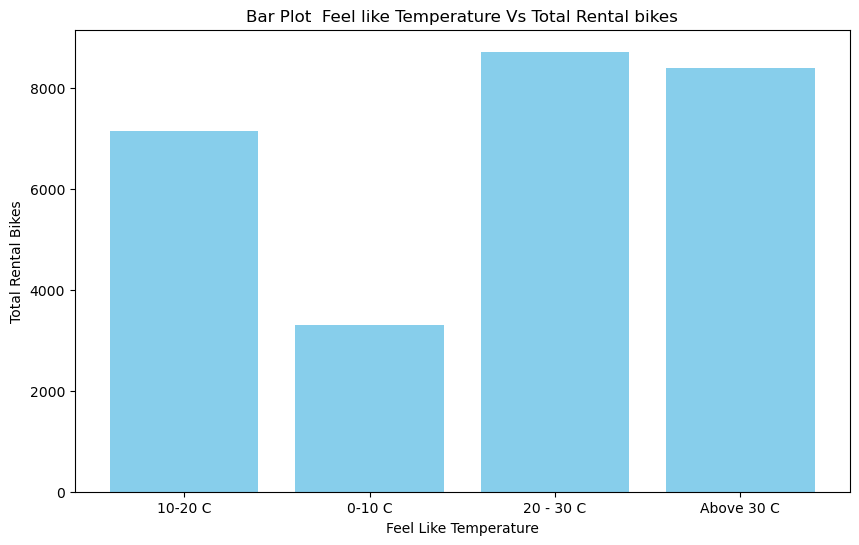

In [21]:
#Bar plot Bivariate analysis between Total Rented bikes vs Feel like temperature
plt.figure(figsize=(10,6))
plt.bar(bike_sharing_vis['atemp_b'],bike_sharing_vis['cnt'], color = 'skyblue' )
plt.title('Bar Plot  Feel like Temperature Vs Total Rental bikes')
plt.xlabel('Feel Like Temperature')
plt.ylabel('Total Rental Bikes')
plt.show()

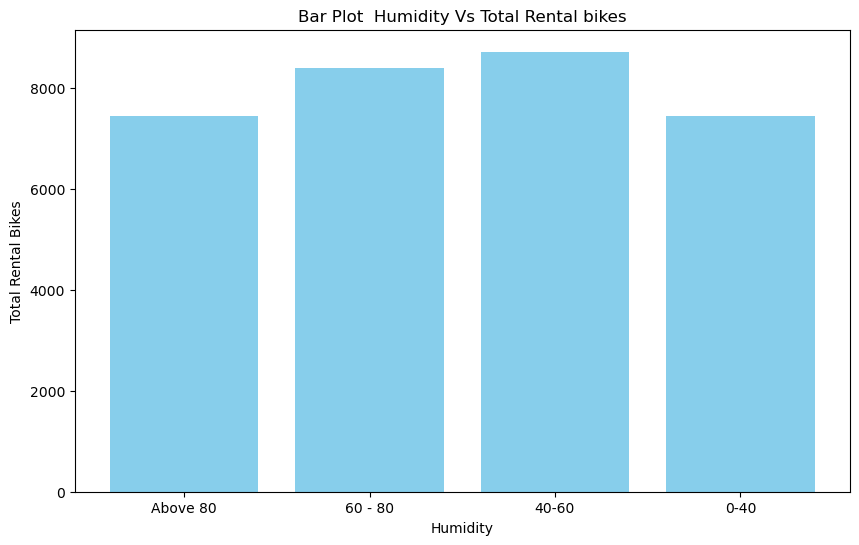

In [22]:
#Bar plot Bivariate analysis between Total Rented bikes vs Humidity
plt.figure(figsize=(10,6))
plt.bar(bike_sharing_vis['hum_b'],bike_sharing_vis['cnt'], color = 'skyblue' )
plt.title('Bar Plot  Humidity Vs Total Rental bikes')
plt.xlabel('Humidity')
plt.ylabel('Total Rental Bikes')
plt.show()

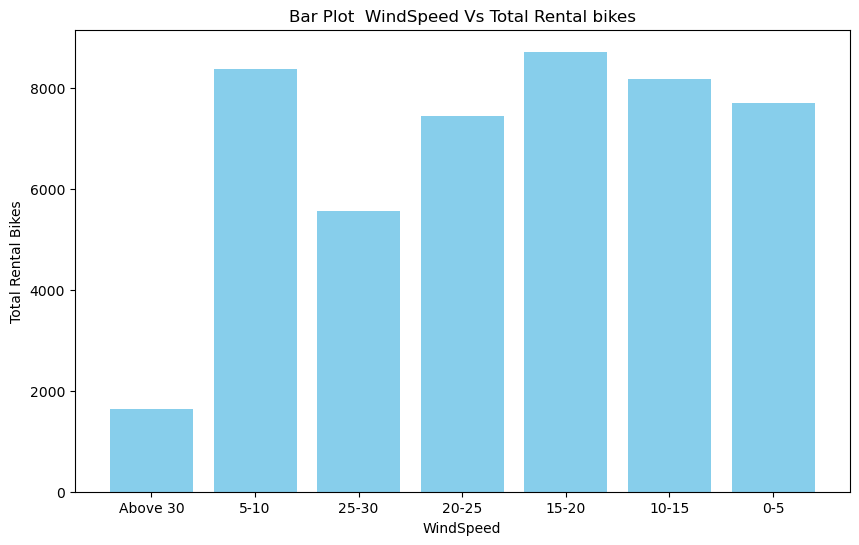

In [23]:
#Bar plot Bivariate analysis between Total Rented bikes vs Windspeed
plt.figure(figsize=(10,6))
bike_sharing_vis= bike_sharing_vis.sort_values('windspeed_b', ascending=False)
plt.bar(bike_sharing_vis['windspeed_b'],bike_sharing_vis['cnt'], color = 'skyblue' )
plt.title('Bar Plot  WindSpeed Vs Total Rental bikes')
plt.xlabel('WindSpeed')
plt.ylabel('Total Rental Bikes')
plt.show()

# Observation from Bivariate Analysis
1. During fall season, Clear weather, during WeekEnd the bike rental goes high
2. 2019 seen higher bike rentals than 2018., In September month rental goes high i.e., during fall season.
3. When the temperature is warm (20 to 30 degree celsius), humidity is 40 to 6 and wind speed is between 5 to 20 the rental goes high.

In [24]:
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,temp_b,atemp_b,hum_b,windspeed_b
0,spring,2018,1,0,Sunday,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985,10-20 C,10-20 C,Above 80,10-15
1,spring,2018,1,0,Monday,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801,10-20 C,10-20 C,60 - 80,15-20
2,spring,2018,1,0,Tuesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,0-10 C,0-10 C,40-60,15-20
3,spring,2018,1,0,Wednesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,0-10 C,10-20 C,40-60,10-15
4,spring,2018,1,0,Thursday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,0-10 C,10-20 C,40-60,10-15


# Step 2 Preparing the Data for Modeling
- in the Step 1 converted numerical columns to categorical columns for better interpretation. and drop the newly drived columns as it not going to be useful anymore.
- Now we need covert the categorical values to numerical values 
    - Keep the binary values 0 and 1
    - Other Categorical variables to dummy vars
- Splitting into train and test data sets
- Rescaling of variables

In [25]:
# Mapping categorical values to numerical values for modeling.
year_map = { 2018: 0, 2019:1}
bike_sharing['yr'] = bike_sharing['yr'].replace(year_map)

#drop the Derived columns temp_b, atemp_b, hum_b and windspeed_b
bike_sharing = bike_sharing.drop(['temp_b','atemp_b','hum_b','windspeed_b'], axis=1)
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,Sunday,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Monday,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Tuesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Wednesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Thursday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## Introducing Dummy Variables to categorical values.

In [26]:
dummy_var = pd.get_dummies(bike_sharing[['season','weekday','weathersit']], drop_first=True)
dummy_var = dummy_var.astype(int)
dummy_var.head()

,season_spring,season_summer,season_winter,weekday_Monday,weekday_Saterday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Cloudy,weathersit_Light-Rain
0,1,0,0,0,0,1,0,0,0,1,0
1,1,0,0,1,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,1,0,0,0,0


In [27]:
bike_sharing = pd.concat([bike_sharing, dummy_var], axis=1)
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,season_summer,season_winter,weekday_Monday,weekday_Saterday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Cloudy,weathersit_Light-Rain
0,spring,0,1,0,Sunday,0,Cloudy,14.110847,18.18125,80.5833,...,0,0,0,0,1,0,0,0,1,0
1,spring,0,1,0,Monday,0,Cloudy,14.902598,17.68695,69.6087,...,0,0,1,0,0,0,0,0,1,0
2,spring,0,1,0,Tuesday,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,1,0,0,0
3,spring,0,1,0,Wednesday,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,1,0,0
4,spring,0,1,0,Thursday,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,1,0,0,0,0


In [28]:
#Now lets drop the Categorical columns
bike_sharing = bike_sharing.drop(['season','weekday','weathersit'],axis=1)
bike_sharing.head()

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weekday_Monday,weekday_Saterday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Cloudy,weathersit_Light-Rain
0,0,1,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,1,0,0,0,1,0
1,0,1,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,1,0,0,0,0,0,1,0
2,0,1,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,0,1,0,0,0
3,0,1,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,0,0,1,0,0
4,0,1,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0


## Splitting into train and test

In [29]:
bs_train, bs_test = train_test_split(bike_sharing, train_size=0.7, random_state=100)
print(bs_train.shape)
print(bs_test.shape)

(510, 20)
(220, 20)


In [30]:
#normalisation : (x - xmin) / ( xmax - xmin)
#standardisation : (x-mu)/sigma

## Rescaling the features
Here we can see that except temp, atemp, hum and windspeed all the columns have small integer values. 
So it is important to rescale the variables so that they have comparable scale.
if we dont have the comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or small as compared to other coefficients.
This might be annoying during model evaluation time. So advised to use any one of the above mentioned scaling methods.
### We will use Min-Max(normalization) Scaling here...

In [31]:
# We dont want to scale all the variables. we can scale only numeric variables.
# Becuase if we scale binary data we will loose interpretation(Meaning of 1 and 0 is clear, so dont want to loose the interpretation)

#1. Instantiation of an scaler object
scaler = MinMaxScaler()

#Numeric columns
num_vars = ['mnth','temp', 'atemp', 'hum','windspeed', 'cnt']
#2. fit_transform(): it learns xmin and xmax & computes x -xmin/xmax-xmin
bs_train[num_vars] = scaler.fit_transform(bs_train[num_vars])
bs_train.head()

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weekday_Monday,weekday_Saterday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Cloudy,weathersit_Light-Rain
576,1,0.545455,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,0,1,0,0
426,1,0.181818,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,0,0,1,0,0,0,1,0
728,1,1.000000,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,1,0,0,0,0,0,0,0
482,1,0.272727,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,0,0,1,0,0,0,1,0
111,0,0.272727,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,0,0,1,0,0,0,0,1,0


In [32]:
bs_train.describe()

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weekday_Monday,weekday_Saterday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Cloudy,weathersit_Light-Rain
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.503743,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,0.143137,0.127451,0.154902,0.158824,0.150980,0.131373,0.345098,0.029412
std,0.500429,0.315038,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,0.350557,0.333805,0.362166,0.365870,0.358381,0.338139,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.181818,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.545455,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.818182,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Heat Map before training the model

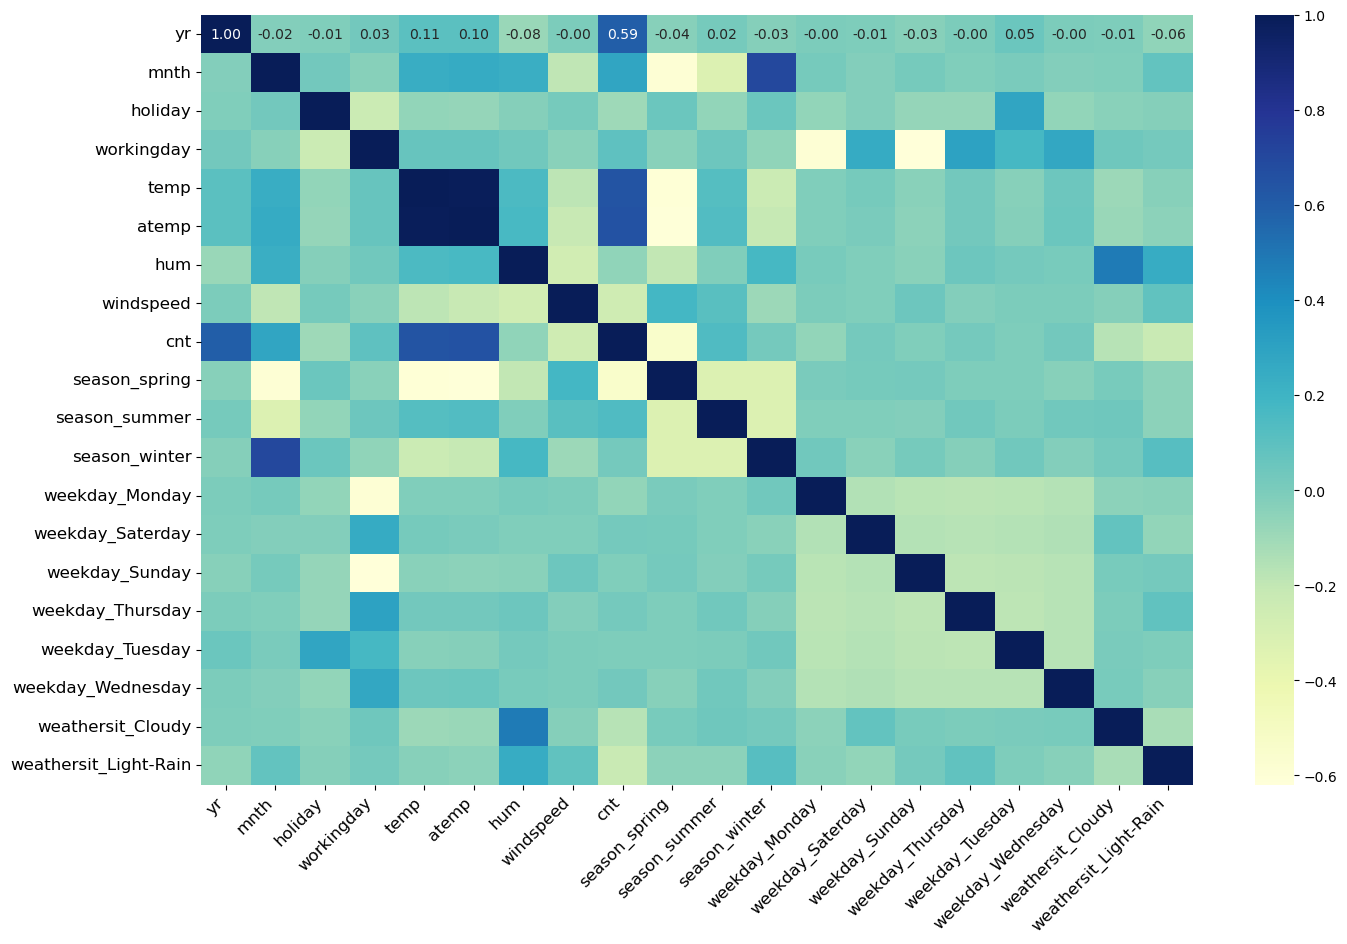

In [33]:
# before training the model, lets see the heat map of correlation between variables.
#heat map
plt.figure(figsize = (16,10))
corr_matrix = bs_train.corr()

# Plot the heatmap
#plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", fmt=".2f", annot_kws={"size": 10})
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [34]:
# the Heat map shows that Total Rental bikes having high correlation with temp. lets see a scatter plot for cnt vs temp

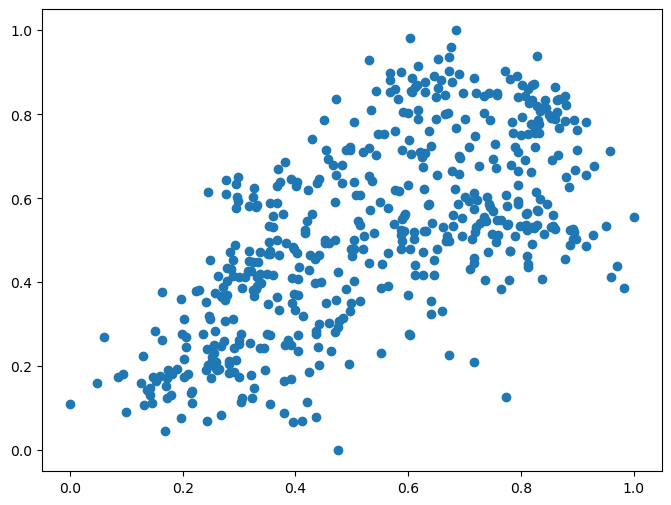

In [35]:
plt.figure(figsize=(8,6))
plt.scatter(bs_train.temp, bs_train.cnt)
plt.show()

## Divide train data set into predictors(X) and Target Variable (Y)

In [36]:
y_train = bs_train.pop('cnt')
X_train = bs_train

# Step 3 Training the Model

In [37]:
#will build a model using stats model for using the benefit of having nice summary of statistics.
#Lets build a model with all the variables and compute VIF of all variables.
#Add a Constant(intercept)
X_train_sm = sm.add_constant(X_train)
#Create a model
mlr = sm.OLS(y_train, X_train_sm)
mlr_models = mlr.fit()
mlr_models.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     136.9
Date:                Wed, 29 May 2024   Prob (F-statistic):          3.97e-178
Time:                        21:48:53   Log-Likelihood:                 496.55
No. Observations:                 510   AIC:                            -955.1
Df Residuals:                     491   BIC:                            -874.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2031      0.031      6.614      0.000       0.143       0.263
yr                        0.2320      0.008     27.573      0.000       0.215       0.249
mnth                      0.0155      0.026      0.599      0.550      -0.035       0.066
holiday                  -0.0023      0.024     -0.098      0.922      -0.050       0.045
workingday                0.0821      0.012      6.875      0.000       0.059       0.106
temp                      0.4372      0.140      3.123      0.002       0.162       0.712
atemp                     0.0581      0.143      0.406      0.685      -0.223       0.339
hum                      -0.1289      0.039     -3.301      0.001      -0.206      -0.052
windspeed                -0.1786      0.027     -6.586      0.000      -0.232      -0.125
season_spring            -0.0695      0.023     -3.001      0.003      -0.115      -0.024
season_summer             0.0469      0.016      2.989      0.003       0.016       0.078
season_winter             0.0831      0.019      4.435      0.000       0.046       0.120
weekday_Monday            0.0336      0.014      2.450      0.015       0.007       0.061
weekday_Saterday          0.0086      0.016      0.528      0.598      -0.023       0.041
weekday_Sunday            0.0897      0.013      6.795      0.000       0.064       0.116
weekday_Thursday          0.0055      0.015      0.357      0.721      -0.025       0.036
weekday_Tuesday          -0.0135      0.016     -0.851      0.395      -0.045       0.018
weekday_Wednesday        -0.0100      0.016     -0.621      0.535      -0.042       0.022
weathersit_Cloudy        -0.0566      0.011     -5.184      0.000      -0.078      -0.035
weathersit_Light-Rain    -0.2483      0.027     -9.034      0.000      -0.302      -0.194
==============================================================================
Omnibus:                       72.934   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.242
Skew:                          -0.729   Prob(JB):                     1.62e-40
Kurtosis:                       5.549   Cond. No.                     8.36e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.6e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Calculating Variable Inflation factor for all variables.

In [38]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [ variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round (vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,workingday,59.33
4,temp,58.63
5,atemp,54.10
13,weekday_Sunday,13.44
11,weekday_Monday,12.84
8,season_spring,5.80
1,mnth,3.90
10,season_winter,3.84
2,holiday,3.37
9,season_summer,2.69


## Following is the way to drop the columns

	1. High p-value, High VIF  - Drop the column

	2. High - Low
		High p value, Low VIF - remove the High p- value first , because by removing the high value the VIF of the other variables will vary ( anything above 0.05 is high)
		Low p value, High VIF -  remove these after the above one. ( above 5 is high)
	3. Low P-value , Low VIF  - Keep the column




## 1. Dropping "atemp"

In [39]:
#Lets drop "atemp" which is having high p-value and high VIF value then rebuild the model
X= X_train.drop('atemp', axis =1)



In [40]:
# Create another model
#build a model with all the variables except(atemp).
X_train_sm = sm.add_constant(X)
#create a model
mlr = sm.OLS(y_train, X_train_sm)
mlr_models = mlr.fit()
mlr_models.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     145.2
Date:                Wed, 29 May 2024   Prob (F-statistic):          3.52e-179
Time:                        21:48:53   Log-Likelihood:                 496.47
No. Observations:                 510   AIC:                            -956.9
Df Residuals:                     492   BIC:                            -880.7
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2028      0.031      6.612      0.000       0.143       0.263
yr                        0.2319      0.008     27.594      0.000       0.215       0.248
mnth                      0.0155      0.026      0.601      0.548      -0.035       0.066
holiday                  -0.0028      0.024     -0.116      0.908      -0.050       0.044
workingday                0.0822      0.012      6.896      0.000       0.059       0.106
temp                      0.4923      0.034     14.365      0.000       0.425       0.560
hum                      -0.1283      0.039     -3.289      0.001      -0.205      -0.052
windspeed                -0.1808      0.027     -6.802      0.000      -0.233      -0.129
season_spring            -0.0685      0.023     -2.977      0.003      -0.114      -0.023
season_summer             0.0480      0.015      3.109      0.002       0.018       0.078
season_winter             0.0843      0.018      4.573      0.000       0.048       0.121
weekday_Monday            0.0336      0.014      2.453      0.015       0.007       0.061
weekday_Saterday          0.0080      0.016      0.494      0.622      -0.024       0.040
weekday_Sunday            0.0897      0.013      6.799      0.000       0.064       0.116
weekday_Thursday          0.0053      0.015      0.343      0.732      -0.025       0.035
weekday_Tuesday          -0.0134      0.016     -0.847      0.397      -0.044       0.018
weekday_Wednesday        -0.0101      0.016     -0.627      0.531      -0.042       0.022
weathersit_Cloudy        -0.0567      0.011     -5.197      0.000      -0.078      -0.035
weathersit_Light-Rain    -0.2490      0.027     -9.091      0.000      -0.303      -0.195
==============================================================================
Omnibus:                       71.756   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.559
Skew:                          -0.717   Prob(JB):                     6.20e-40
Kurtosis:                       5.537   Cond. No.                     7.99e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.63e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [41]:
# recalculate the VIF

In [42]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [ variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round (vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,workingday,59.32
12,weekday_Sunday,13.44
10,weekday_Monday,12.83
7,season_spring,5.73
1,mnth,3.90
9,season_winter,3.73
4,temp,3.52
2,holiday,3.36
8,season_summer,2.61
5,hum,1.90


### "atemp" is a multicollinearity Variable, Even after drop it the R2 value doesnot change. Still it 83.4%

## 2. Dropping atemp and holiday

In [43]:
# as per the guidelines High p value, Low VIF - remove the High p- value first 
#Now lets drop the "holiday" variable. and rebuild the model again.
X= X_train.drop(['atemp','holiday'], axis =1)

In [44]:
# Create another model
#build a model with all the variables except(atemp,holiday).
X_train_sm = sm.add_constant(X)
#create a model
mlr = sm.OLS(y_train, X_train_sm)
mlr_models = mlr.fit()
mlr_models.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     145.2
Date:                Wed, 29 May 2024   Prob (F-statistic):          3.52e-179
Time:                        21:48:53   Log-Likelihood:                 496.47
No. Observations:                 510   AIC:                            -956.9
Df Residuals:                     492   BIC:                            -880.7
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2000      0.047      4.226      0.000       0.107       0.293
yr                        0.2319      0.008     27.594      0.000       0.215       0.248
mnth                      0.0155      0.026      0.601      0.548      -0.035       0.066
workingday                0.0850      0.027      3.092      0.002       0.031       0.139
temp                      0.4923      0.034     14.365      0.000       0.425       0.560
hum                      -0.1283      0.039     -3.289      0.001      -0.205      -0.052
windspeed                -0.1808      0.027     -6.802      0.000      -0.233      -0.129
season_spring            -0.0685      0.023     -2.977      0.003      -0.114      -0.023
season_summer             0.0480      0.015      3.109      0.002       0.018       0.078
season_winter             0.0843      0.018      4.573      0.000       0.048       0.121
weekday_Monday            0.0364      0.031      1.176      0.240      -0.024       0.097
weekday_Saterday          0.0080      0.016      0.494      0.622      -0.024       0.040
weekday_Sunday            0.0925      0.031      3.002      0.003       0.032       0.153
weekday_Thursday          0.0053      0.015      0.343      0.732      -0.025       0.035
weekday_Tuesday          -0.0134      0.016     -0.847      0.397      -0.044       0.018
weekday_Wednesday        -0.0101      0.016     -0.627      0.531      -0.042       0.022
weathersit_Cloudy        -0.0567      0.011     -5.197      0.000      -0.078      -0.035
weathersit_Light-Rain    -0.2490      0.027     -9.091      0.000      -0.303      -0.195
==============================================================================
Omnibus:                       71.756   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.559
Skew:                          -0.717   Prob(JB):                     6.20e-40
Kurtosis:                       5.537   Cond. No.                         28.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [ variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round (vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
4,hum,33.97
2,workingday,20.02
3,temp,19.13
1,mnth,12.65
11,weekday_Sunday,5.66
9,weekday_Monday,5.44
6,season_spring,5.23
5,windspeed,5.02
8,season_winter,4.67
7,season_summer,2.90


# Even after Dropping atemp and holiday R2 value doesnot change. still it is 83.4%

# 3.  Dropping atemp, holiday, weekday_Thursday

In [46]:
## as per the guidelines High p value, Low VIF - remove the High p- value first 
#Now lets drop the "weekday_Thusday" variable, which has p-value of 0.732. Rebuild the model again.
X= X_train.drop(['atemp','holiday','weekday_Thursday'], axis =1)

In [47]:
# Create another model
#build a model with all the variables except(atemp,holiday, weekday_Thursday).
X_train_sm = sm.add_constant(X)
#create a model
mlr = sm.OLS(y_train, X_train_sm)
mlr_models = mlr.fit()
mlr_models.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     154.5
Date:                Wed, 29 May 2024   Prob (F-statistic):          2.95e-180
Time:                        21:48:53   Log-Likelihood:                 496.40
No. Observations:                 510   AIC:                            -958.8
Df Residuals:                     493   BIC:                            -886.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2020      0.047      4.305      0.000       0.110       0.294
yr                        0.2319      0.008     27.620      0.000       0.215       0.248
mnth                      0.0153      0.026      0.591      0.555      -0.035       0.066
workingday                0.0855      0.027      3.114      0.002       0.032       0.139
temp                      0.4926      0.034     14.394      0.000       0.425       0.560
hum                      -0.1279      0.039     -3.284      0.001      -0.204      -0.051
windspeed                -0.1808      0.027     -6.810      0.000      -0.233      -0.129
season_spring            -0.0683      0.023     -2.975      0.003      -0.113      -0.023
season_summer             0.0481      0.015      3.122      0.002       0.018       0.078
season_winter             0.0845      0.018      4.590      0.000       0.048       0.121
weekday_Monday            0.0340      0.030      1.128      0.260      -0.025       0.093
weekday_Saterday          0.0052      0.014      0.371      0.711      -0.022       0.033
weekday_Sunday            0.0901      0.030      3.006      0.003       0.031       0.149
weekday_Tuesday          -0.0162      0.014     -1.200      0.231      -0.043       0.010
weekday_Wednesday        -0.0130      0.014     -0.945      0.345      -0.040       0.014
weathersit_Cloudy        -0.0567      0.011     -5.197      0.000      -0.078      -0.035
weathersit_Light-Rain    -0.2488      0.027     -9.094      0.000      -0.303      -0.195
==============================================================================
Omnibus:                       72.173   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              181.831
Skew:                          -0.721   Prob(JB):                     3.28e-40
Kurtosis:                       5.545   Cond. No.                         28.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [ variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round (vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
4,hum,33.73
2,workingday,19.59
3,temp,18.97
1,mnth,12.65
11,weekday_Sunday,5.44
9,weekday_Monday,5.23
6,season_spring,5.17
5,windspeed,5.02
8,season_winter,4.65
7,season_summer,2.88


# 4.  Dropping atemp, holiday, weekday_Thursday , weekday_Saterday

In [49]:
## as per the guidelines High p value, Low VIF - remove the High p- value first 
#Now lets drop the "weekday_Saterday" variable, which has p-value of 0.711. Rebuild the model again.
X= X_train.drop(['atemp','holiday','weekday_Thursday','weekday_Saterday'], axis =1)

In [50]:
# Create another model
#build a model with all the variables except(atemp,holiday, weekday_Thursday, weekday_Saterday).
X_train_sm = sm.add_constant(X)
#create a model
mlr = sm.OLS(y_train, X_train_sm)
mlr_models = mlr.fit()
mlr_models.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     165.1
Date:                Wed, 29 May 2024   Prob (F-statistic):          2.42e-181
Time:                        21:48:53   Log-Likelihood:                 496.33
No. Observations:                 510   AIC:                            -960.7
Df Residuals:                     494   BIC:                            -892.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2040      0.047      4.381      0.000       0.113       0.296
yr                        0.2319      0.008     27.641      0.000       0.215       0.248
mnth                      0.0151      0.026      0.587      0.558      -0.036       0.066
workingday                0.0854      0.027      3.115      0.002       0.032       0.139
temp                      0.4927      0.034     14.407      0.000       0.425       0.560
hum                      -0.1284      0.039     -3.302      0.001      -0.205      -0.052
windspeed                -0.1808      0.027     -6.816      0.000      -0.233      -0.129
season_spring            -0.0685      0.023     -2.983      0.003      -0.114      -0.023
season_summer             0.0480      0.015      3.115      0.002       0.018       0.078
season_winter             0.0845      0.018      4.592      0.000       0.048       0.121
weekday_Monday            0.0324      0.030      1.087      0.277      -0.026       0.091
weekday_Sunday            0.0885      0.030      2.987      0.003       0.030       0.147
weekday_Tuesday          -0.0178      0.013     -1.388      0.166      -0.043       0.007
weekday_Wednesday        -0.0146      0.013     -1.117      0.265      -0.040       0.011
weathersit_Cloudy        -0.0563      0.011     -5.188      0.000      -0.078      -0.035
weathersit_Light-Rain    -0.2495      0.027     -9.144      0.000      -0.303      -0.196
==============================================================================
Omnibus:                       71.706   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.697
Skew:                          -0.716   Prob(JB):                     5.78e-40
Kurtosis:                       5.540   Cond. No.                         27.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [ variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round (vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
4,hum,33.73
2,workingday,19.47
3,temp,18.90
1,mnth,12.65
10,weekday_Sunday,5.39
9,weekday_Monday,5.18
6,season_spring,5.15
5,windspeed,5.01
8,season_winter,4.65
7,season_summer,2.88


# 5. Dropping atemp, holiday, weekday_Thursday , weekday_Saterday, mnth

In [52]:
## as per the guidelines High p value, High VIF - remove the High p- value first 
#Now lets drop the "mnth" variable, which has p-value of 0.558 and VIF = 12.65. Rebuild the model again.
X= X_train.drop(['atemp','holiday','weekday_Thursday','weekday_Saterday','mnth'], axis =1)

In [53]:
# Create another model
#build a model with all the variables except(atemp,holiday, weekday_Thursday, weekday_Saterday,mnth).
X_train_sm = sm.add_constant(X)
#create a model
mlr = sm.OLS(y_train, X_train_sm)
mlr_models = mlr.fit()
mlr_models.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     177.1
Date:                Wed, 29 May 2024   Prob (F-statistic):          2.12e-182
Time:                        21:48:53   Log-Likelihood:                 496.16
No. Observations:                 510   AIC:                            -962.3
Df Residuals:                     495   BIC:                            -898.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2122      0.044      4.777      0.000       0.125       0.299
yr                        0.2317      0.008     27.657      0.000       0.215       0.248
workingday                0.0847      0.027      3.093      0.002       0.031       0.138
temp                      0.4935      0.034     14.455      0.000       0.426       0.561
hum                      -0.1263      0.039     -3.263      0.001      -0.202      -0.050
windspeed                -0.1805      0.027     -6.809      0.000      -0.233      -0.128
season_spring            -0.0746      0.020     -3.648      0.000      -0.115      -0.034
season_summer             0.0439      0.014      3.201      0.001       0.017       0.071
season_winter             0.0889      0.017      5.298      0.000       0.056       0.122
weekday_Monday            0.0315      0.030      1.059      0.290      -0.027       0.090
weekday_Sunday            0.0878      0.030      2.969      0.003       0.030       0.146
weekday_Tuesday          -0.0182      0.013     -1.420      0.156      -0.043       0.007
weekday_Wednesday        -0.0150      0.013     -1.148      0.251      -0.041       0.011
weathersit_Cloudy        -0.0567      0.011     -5.230      0.000      -0.078      -0.035
weathersit_Light-Rain    -0.2504      0.027     -9.200      0.000      -0.304      -0.197
==============================================================================
Omnibus:                       71.934   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              181.914
Skew:                          -0.717   Prob(JB):                     3.15e-40
Kurtosis:                       5.550   Cond. No.                         26.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [ variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round (vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,hum,31.82
1,workingday,18.91
2,temp,18.12
9,weekday_Sunday,5.23
8,weekday_Monday,5.08
4,windspeed,4.94
5,season_spring,4.48
7,season_winter,3.39
6,season_summer,2.46
12,weathersit_Cloudy,2.32


# 6. Dropping atemp, holiday, weekday_Thursday , weekday_Saterday, mnth, hum

In [55]:
# humidity having higher VIF
## as per the guidelines Low p value, High VIF - remove the High VIF- value second
#Now lets drop the "hum" variable, which has p-value of 0.001 and VIF = 31.82. Rebuild the model again.
X= X_train.drop(['atemp','holiday','weekday_Thursday','weekday_Saterday','mnth','hum'], axis =1)


In [56]:
# Create another model
#build a model with all the variables except(atemp,holiday, weekday_Thursday, weekday_Saterday,mnth,hum).
X_train_sm = sm.add_constant(X)
#create a model
mlr = sm.OLS(y_train, X_train_sm)
mlr_models = mlr.fit()
mlr_models.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     186.3
Date:                Wed, 29 May 2024   Prob (F-statistic):          2.87e-181
Time:                        21:48:53   Log-Likelihood:                 490.73
No. Observations:                 510   AIC:                            -953.5
Df Residuals:                     496   BIC:                            -894.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1487      0.040      3.689      0.000       0.070       0.228
yr                        0.2348      0.008     27.947      0.000       0.218       0.251
workingday                0.0850      0.028      3.076      0.002       0.031       0.139
temp                      0.4668      0.033     13.948      0.000       0.401       0.533
windspeed                -0.1551      0.026     -6.062      0.000      -0.205      -0.105
season_spring            -0.0816      0.021     -3.974      0.000      -0.122      -0.041
season_summer             0.0395      0.014      2.868      0.004       0.012       0.067
season_winter             0.0778      0.017      4.688      0.000       0.045       0.110
weekday_Monday            0.0290      0.030      0.967      0.334      -0.030       0.088
weekday_Sunday            0.0890      0.030      2.981      0.003       0.030       0.148
weekday_Tuesday          -0.0200      0.013     -1.554      0.121      -0.045       0.005
weekday_Wednesday        -0.0160      0.013     -1.217      0.224      -0.042       0.010
weathersit_Cloudy        -0.0772      0.009     -8.682      0.000      -0.095      -0.060
weathersit_Light-Rain    -0.2858      0.025    -11.332      0.000      -0.335      -0.236
==============================================================================
Omnibus:                       70.264   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.488
Skew:                          -0.707   Prob(JB):                     1.29e-38
Kurtosis:                       5.492   Cond. No.                         23.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [ variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round (vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,workingday,16.35
2,temp,12.29
3,windspeed,4.77
8,weekday_Sunday,4.64
7,weekday_Monday,4.39
4,season_spring,3.69
6,season_winter,2.62
5,season_summer,2.26
0,yr,2.08
11,weathersit_Cloudy,1.57


# 7. Dropping atemp, holiday, weekday_Thursday , weekday_Saterday, mnth, hum, workingday

In [58]:
# workingday having higher VIF
## as per the guidelines Low p value, High VIF - remove the High VIF- value second
#Now lets drop the "workingday" variable, which has p-value of 0.002 and VIF = 16.35. Rebuild the model again.
X= X_train.drop(['atemp','holiday','weekday_Thursday','weekday_Saterday','mnth','hum','workingday'], axis =1)

In [59]:
# Create another model
#build a model with all the variables except(atemp,holiday, weekday_Thursday, weekday_Saterday,mnth,hum,workingday).
X_train_sm = sm.add_constant(X)
#create a model
mlr = sm.OLS(y_train, X_train_sm)
mlr_models = mlr.fit()
mlr_models.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     197.6
Date:                Wed, 29 May 2024   Prob (F-statistic):          2.12e-180
Time:                        21:48:54   Log-Likelihood:                 485.91
No. Observations:                 510   AIC:                            -945.8
Df Residuals:                     497   BIC:                            -890.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2324      0.030      7.738      0.000       0.173       0.291
yr                        0.2356      0.008     27.814      0.000       0.219       0.252
temp                      0.4673      0.034     13.845      0.000       0.401       0.534
windspeed                -0.1566      0.026     -6.072      0.000      -0.207      -0.106
season_spring            -0.0833      0.021     -4.024      0.000      -0.124      -0.043
season_summer             0.0404      0.014      2.908      0.004       0.013       0.068
season_winter             0.0760      0.017      4.546      0.000       0.043       0.109
weekday_Monday           -0.0545      0.013     -4.233      0.000      -0.080      -0.029
weekday_Sunday            0.0054      0.012      0.434      0.664      -0.019       0.030
weekday_Tuesday          -0.0298      0.013     -2.362      0.019      -0.055      -0.005
weekday_Wednesday        -0.0148      0.013     -1.120      0.263      -0.041       0.011
weathersit_Cloudy        -0.0759      0.009     -8.468      0.000      -0.094      -0.058
weathersit_Light-Rain    -0.2824      0.025    -11.114      0.000      -0.332      -0.232
==============================================================================
Omnibus:                       81.935   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              222.892
Skew:                          -0.788   Prob(JB):                     3.98e-49
Kurtosis:                       5.829   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [ variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round (vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,windspeed,4.63
1,temp,3.96
0,yr,2.07
3,season_spring,2.04
4,season_summer,1.83
5,season_winter,1.70
10,weathersit_Cloudy,1.53
7,weekday_Sunday,1.36
8,weekday_Tuesday,1.35
6,weekday_Monday,1.34


# 8. Dropping atemp, holiday, weekday_Thursday , weekday_Saterday, mnth, hum, workingday, weekday_Sunday

In [61]:
## as per the guidelines High p value, Low VIF - remove the High p- value first 
#Now lets drop the "weekday_Sunday" variable, which has p-value of 0.664. Rebuild the model again.
X= X_train.drop(['atemp','holiday','weekday_Thursday','weekday_Saterday','mnth','hum','workingday','weekday_Sunday'], axis =1)

In [62]:
# Create another model
#build a model with all the variables except(atemp,holiday, weekday_Thursday, weekday_Saterday,mnth,hum,workingday).
X_train_sm = sm.add_constant(X)
#create a model
mlr = sm.OLS(y_train, X_train_sm)
mlr_models = mlr.fit()
mlr_models.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     215.9
Date:                Wed, 29 May 2024   Prob (F-statistic):          1.55e-181
Time:                        21:48:54   Log-Likelihood:                 485.81
No. Observations:                 510   AIC:                            -947.6
Df Residuals:                     498   BIC:                            -896.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2339      0.030      7.849      0.000       0.175       0.292
yr                        0.2355      0.008     27.833      0.000       0.219       0.252
temp                      0.4669      0.034     13.850      0.000       0.401       0.533
windspeed                -0.1561      0.026     -6.063      0.000      -0.207      -0.106
season_spring            -0.0834      0.021     -4.032      0.000      -0.124      -0.043
season_summer             0.0403      0.014      2.905      0.004       0.013       0.068
season_winter             0.0761      0.017      4.555      0.000       0.043       0.109
weekday_Monday           -0.0560      0.012     -4.510      0.000      -0.080      -0.032
weekday_Tuesday          -0.0313      0.012     -2.574      0.010      -0.055      -0.007
weekday_Wednesday        -0.0163      0.013     -1.271      0.204      -0.041       0.009
weathersit_Cloudy        -0.0759      0.009     -8.477      0.000      -0.094      -0.058
weathersit_Light-Rain    -0.2825      0.025    -11.128      0.000      -0.332      -0.233
==============================================================================
Omnibus:                       80.572   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.718
Skew:                          -0.771   Prob(JB):                     7.15e-49
Kurtosis:                       5.838   Cond. No.                         17.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [ variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round (vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,windspeed,4.60
1,temp,3.80
0,yr,2.07
3,season_spring,2.00
4,season_summer,1.82
5,season_winter,1.66
9,weathersit_Cloudy,1.53
7,weekday_Tuesday,1.26
6,weekday_Monday,1.25
8,weekday_Wednesday,1.23


# 9. Dropping atemp, holiday, weekday_Thursday , weekday_Saterday, mnth, hum, workingday, weekday_Sunday, weekday_Wednesday

In [64]:
## as per the guidelines High p value, Low VIF - remove the High p- value first 
#Now lets drop the "weekday_Wednesday" variable, which has p-value of 0.204, Rebuild the model again.
X= X_train.drop(['atemp','holiday','weekday_Thursday','weekday_Saterday','mnth','hum','workingday','weekday_Sunday','weekday_Wednesday'], axis =1)

In [65]:
# Create another model
#build a model with all the variables except(atemp,holiday, weekday_Thursday, weekday_Saterday,mnth,hum,workingday).
X_train_sm = sm.add_constant(X)
X_train_sm.head()
#create a model
mlr = sm.OLS(y_train, X_train_sm)
mlr_models = mlr.fit()
mlr_models.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     237.1
Date:                Wed, 29 May 2024   Prob (F-statistic):          2.19e-182
Time:                        21:48:54   Log-Likelihood:                 484.99
No. Observations:                 510   AIC:                            -948.0
Df Residuals:                     499   BIC:                            -901.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2318      0.030      7.785      0.000       0.173       0.290
yr                        0.2355      0.008     27.813      0.000       0.219       0.252
temp                      0.4657      0.034     13.811      0.000       0.399       0.532
windspeed                -0.1562      0.026     -6.064      0.000      -0.207      -0.106
season_spring            -0.0836      0.021     -4.040      0.000      -0.124      -0.043
season_summer             0.0398      0.014      2.871      0.004       0.013       0.067
season_winter             0.0758      0.017      4.532      0.000       0.043       0.109
weekday_Monday           -0.0529      0.012     -4.343      0.000      -0.077      -0.029
weekday_Tuesday          -0.0282      0.012     -2.369      0.018      -0.052      -0.005
weathersit_Cloudy        -0.0759      0.009     -8.470      0.000      -0.093      -0.058
weathersit_Light-Rain    -0.2811      0.025    -11.077      0.000      -0.331      -0.231
==============================================================================
Omnibus:                       78.911   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.820
Skew:                          -0.749   Prob(JB):                     6.80e-49
Kurtosis:                       5.863   Cond. No.                         17.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [ variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round (vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,windspeed,4.60
1,temp,3.66
0,yr,2.07
3,season_spring,1.98
4,season_summer,1.81
5,season_winter,1.65
8,weathersit_Cloudy,1.53
6,weekday_Monday,1.21
7,weekday_Tuesday,1.21
9,weathersit_Light-Rain,1.08


## Now by looking at the VIF and P values none of variables are above the VIF values of 5 and p values are not above the 0.5. So this is the final model we got it.
### All these variable are explaining the 82.6% of variance in bike demand.


# Step 4 Residual Analysis

In [67]:
#y_train_pred = mlr_models.predict(X_train_sm)
X_train_sm.head()

,const,yr,temp,windspeed,season_spring,season_summer,season_winter,weekday_Monday,weekday_Tuesday,weathersit_Cloudy,weathersit_Light-Rain
576,1.0,1,0.815169,0.264686,0,0,0,0,0,0,0
426,1.0,1,0.442393,0.255342,1,0,0,0,0,1,0
728,1.0,1,0.245101,0.663106,1,0,0,1,0,0,0
482,1.0,1,0.395666,0.188475,0,1,0,0,0,1,0
111,1.0,0,0.345824,0.380981,0,1,0,0,0,1,0


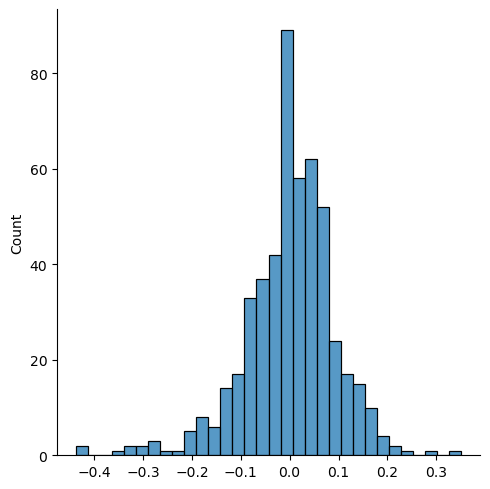

In [68]:
# compute the residuals
y_train_pred = mlr_models.predict(X_train_sm)
res = y_train - y_train_pred
sns.displot(res)

## Here Error term mean is zero. following normal distribution.

# Model building Using RFE(Recursive Feature Elimination)
 - we have Imported and Prepared the data.
 - Introduced Dummy variables
 - Split data into train and test set, Scalled the features to common range
 - Divided into X and Y sets for model building..

In [69]:
#Lets run RFE with 12 output variables.
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=2)
rfe = rfe.fit(X_train, y_train)

In [70]:
# Get the ranking of features
print("Feature Ranking: ", rfe.ranking_)

Feature Ranking:  [ 3 13  6 10  1 12  1  2  5 11  8 14 17  9 18 15 16  7  4]


In [71]:
# this displays How RFE is ranked all the features and what are the top 12 features to be selected.
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', False, 3),
 ('mnth', False, 13),
 ('holiday', False, 6),
 ('workingday', False, 10),
 ('temp', True, 1),
 ('atemp', False, 12),
 ('hum', True, 1),
 ('windspeed', False, 2),
 ('season_spring', False, 5),
 ('season_summer', False, 11),
 ('season_winter', False, 8),
 ('weekday_Monday', False, 14),
 ('weekday_Saterday', False, 17),
 ('weekday_Sunday', False, 9),
 ('weekday_Thursday', False, 18),
 ('weekday_Tuesday', False, 15),
 ('weekday_Wednesday', False, 16),
 ('weathersit_Cloudy', False, 7),
 ('weathersit_Light-Rain', False, 4)]

In [72]:
# Feature selected columns
columns = X_train.columns[rfe.support_]


### Not sure why RFE returns only two colums are required when we say 12 columns..
### Lets build a model with stats model with RFE selected columns..

In [73]:

X_train_rfe = X_train[columns]
X_train_rfe = sm.add_constant(X_train_rfe)
mlm = sm.OLS(y_train, X_train_rfe)
mlm_models = mlm.fit()
mlm_models.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     200.8
Date:                Wed, 29 May 2024   Prob (F-statistic):           5.99e-65
Time:                        21:48:54   Log-Likelihood:                 187.65
No. Observations:                 510   AIC:                            -369.3
Df Residuals:                     507   BIC:                            -356.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3185      0.036      8.769      0.000       0.247       0.390
temp           0.6661      0.033     19.960      0.000       0.601       0.732
hum           -0.2506      0.052     -4.850      0.000      -0.352      -0.149
==============================================================================
Omnibus:                        4.282   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.118   Jarque-Bera (JB):                3.354
Skew:                           0.078   Prob(JB):                        0.187
Kurtosis:                       2.635   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
X_train_new = X_train[columns]
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [ variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round (vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,temp,6.0
1,hum,6.0


In [75]:
# Now let's add another 10 features based on the ranking and build the model again.
#now add a constant // in the stats model first we need to add a constant
X_train_sm = X_train [['temp','hum','windspeed','yr','weathersit_Light-Rain','season_spring','holiday','weathersit_Cloudy','season_winter','weekday_Sunday','workingday','season_summer']]
X_train_sm = sm.add_constant(X_train_sm)
# lets build a first model

lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     206.1
Date:                Wed, 29 May 2024   Prob (F-statistic):          3.95e-184
Time:                        21:48:54   Log-Likelihood:                 494.76
No. Observations:                 510   AIC:                            -963.5
Df Residuals:                     497   BIC:                            -908.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2454      0.037      6.651      0.000       0.173       0.318
temp                      0.4948      0.034     14.499      0.000       0.428       0.562
hum                      -0.1292      0.039     -3.341      0.001      -0.205      -0.053
windspeed                -0.1815      0.027     -6.844      0.000      -0.234      -0.129
yr                        0.2311      0.008     27.618      0.000       0.215       0.248
weathersit_Light-Rain    -0.2481      0.027     -9.123      0.000      -0.302      -0.195
season_spring            -0.0739      0.020     -3.615      0.000      -0.114      -0.034
holiday                  -0.0455      0.028     -1.621      0.106      -0.101       0.010
weathersit_Cloudy        -0.0562      0.011     -5.183      0.000      -0.077      -0.035
season_winter             0.0887      0.017      5.282      0.000       0.056       0.122
weekday_Sunday            0.0562      0.015      3.706      0.000       0.026       0.086
workingday                0.0467      0.012      3.876      0.000       0.023       0.070
season_summer             0.0436      0.014      3.179      0.002       0.017       0.071
==============================================================================
Omnibus:                       70.425   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.155
Skew:                          -0.699   Prob(JB):                     7.58e-40
Kurtosis:                       5.554   Cond. No.                         21.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
X_train_new = X_train_sm
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [ variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round (vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,80.40
6,season_spring,4.55
1,temp,3.50
9,season_winter,3.10
12,season_summer,2.07
2,hum,1.88
11,workingday,1.87
10,weekday_Sunday,1.78
8,weathersit_Cloudy,1.57
5,weathersit_Light-Rain,1.25


### The Constant (Intercept is having higher VIF)


# Step-5 Predictions and Evaluation on the test set

## scaling the numerical variables for test data set

In [77]:
#Create a list of numeric variables . You never ever fit on the test data set.
num_vars = ['mnth','temp', 'atemp', 'hum','windspeed', 'cnt']
#1. transform(): 
bs_test[num_vars] = scaler.transform(bs_test[num_vars])
bs_test.head()

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weekday_Monday,weekday_Saterday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Cloudy,weathersit_Light-Rain
184,0,0.545455,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,0,0,0,0,1,0,1,0
535,1,0.454545,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,0,0,0,0,1,0,0,0,0
299,0,0.818182,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,0,0,0,0,0,0,1,0
221,0,0.636364,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,0,0,0,1,0,0,0,0
152,0,0.454545,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,0,0,0,0,0,0,0,0,0


In [78]:
bs_test.describe()

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weekday_Monday,weekday_Saterday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Cloudy,weathersit_Light-Rain
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.499174,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,0.145455,0.177273,0.118182,0.100000,0.127273,0.168182,0.318182,0.027273
std,0.500809,0.311120,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,0.353363,0.382770,0.323559,0.300684,0.334038,0.374881,0.466833,0.163248
min,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.272727,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.454545,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.727273,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [79]:
y_test = bs_test.pop('cnt')
X_test = bs_test

In [80]:
X_test_sm = sm.add_constant(X_test)

### we need to remove the some of the column in the test set as we have removed in the training set.

In [81]:
X_test_sm = X_test_sm.drop(['atemp','holiday','weekday_Thursday','weekday_Saterday','mnth','hum','workingday','weekday_Sunday','weekday_Wednesday'], axis =1)
X_test_sm.head()

,const,yr,temp,windspeed,season_spring,season_summer,season_winter,weekday_Monday,weekday_Tuesday,weathersit_Cloudy,weathersit_Light-Rain
184,1.0,0,0.831783,0.084219,0,0,0,0,1,1,0
535,1.0,1,0.901354,0.153728,0,1,0,0,0,0,0
299,1.0,0,0.511964,0.334206,0,0,1,0,0,1,0
221,1.0,0,0.881625,0.339570,0,0,0,0,0,0,0
152,1.0,0,0.817246,0.537414,0,1,0,0,0,0,0


In [82]:
# predict 
y_test_pred = mlr_models.predict(X_test_sm)

In [83]:
# to evaluate the model need to compute the R2. 
r2_score(y_true = y_test, y_pred = y_test_pred)

0.8014187579845296

# R-squared Value on the train data set is :	0.826
# R-squared Value on the test data set is :    0.8014187579845296
It is quite close the the training set R2 . This means that our model has learned on the training set and it is able to generalize very well.

# The equation for the best fit line is 
Total Bike Demand  = 0.2318 + 0.4657 x temp + 0.2355 x yr -0.1562 x windspeed  -0.0836 x season_spring + 0.0398 x season_summer + 0.0758 x season_winter - 0.0529 x weekday_Monday -0.0282 x weekday_Tuesday  - 0.0759 x weathersit_Cloudy -0.2811 x weathersit_Light-Rain

# Summary
## Temp is having higher positive coefficient, so temperature is major influencing factor on the increase of bike demand.
## Similarly year is having next highest coefficent. season summer and winter also influencing the increase of bike demand.
## When there is Rain and cloudy and windspeed reduces the bike demand due to negative coefficents.